In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import time
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

from sklearn import metrics as mt
from sklearn.cluster import KMeans

In [2]:
X_train=pd.read_csv("C://Bayesian work//x_train.csv")
X_test=pd.read_csv("C://Bayesian work//x_test.csv")

y_train=pd.read_csv("C://Bayesian work//y_train.csv")
y_test=pd.read_csv("C://Bayesian work//y_test.csv")



Text(0, 0.5, 'WCSS')

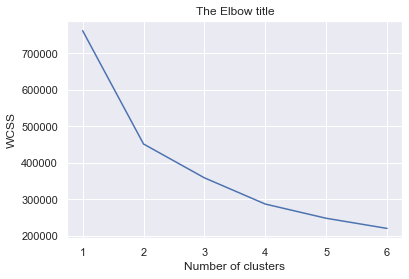

In [3]:
wcss=[]
for i in range(1,7):
    
    kmeans = KMeans(i)
    kmeans.fit(X_train)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [4]:
clustering = KMeans(n_clusters=2, random_state=8675309,n_jobs=-1)
clustering.fit(X_train)

train_labels = clustering.labels_

X_train_clstrs = X_train.copy()
X_train_clstrs['clusters'] = train_labels
    

test_labels = clustering.predict(X_test)

X_test_clstrs = X_test.copy()
X_test_clstrs['clusters'] = test_labels

# SCALING

In [5]:
from sklearn.preprocessing import StandardScaler

#Scaling the dataset with clusters
scaler= StandardScaler()
X_train_clstrs= scaler.fit_transform(X_train_clstrs)
X_test_clstrs= scaler.transform(X_test_clstrs)

#scaling the dataset without cluster feature
scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# WITHOUT CLUSTERING FEATURE

In [6]:
from xgboost import XGBClassifier
import sklearn.metrics as mt

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

y_pred3 = xgb.predict(X_test)


print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred3, beta=2)))
print(mt.confusion_matrix(y_test,y_pred3))

[15:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F-Beta Score : 0.979
[[ 513   42]
 [  47 2111]]


# WITH CLUSTERING FEATURE

In [10]:
xgb = XGBClassifier()
xgb.fit(X_train_clstrs, y_train)

y_pred = xgb.predict(X_test_clstrs)


print('F-Beta Score : {0:.3f}'.format(mt.fbeta_score(y_test, y_pred, beta=2)))
print(mt.confusion_matrix(y_test,y_pred))

[15:53:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F-Beta Score : 0.980
[[ 520   35]
 [  45 2113]]
